In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [318]:
df = pd.read_csv('churn.csv')

In [319]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [321]:
df.duplicated('CustomerId').sum()

0

In [322]:
df = df.set_index('CustomerId')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [324]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [325]:
#since we can't use object in ml model
df.replace({'Geography':{'France': 2,'Germany': 1,'Spain':0}},inplace=True)

In [326]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [327]:
df.replace({'Gender':{'Male': 1,'Female': 0}},inplace=True)

In [328]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [329]:
#since 3 and 4 have less NumOfProduct therefore we club 2,3,4 as 1 category
df.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}},inplace=True)

In [330]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [331]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [332]:
#no. of customer who have zero balance may have higher chance of leaving bank
df.loc[(df['Balance']==0), 'Exited'].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

In [333]:
#creating new column using np.where function giving it category 1,0
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

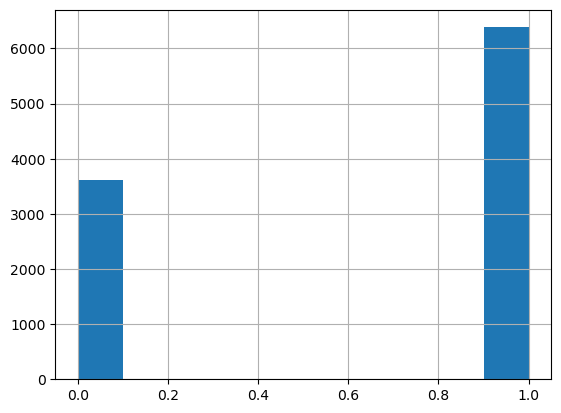

In [334]:
df['Zero Balance'].hist()

In [335]:
df.groupby(['Exited','Geography']).count()

RowNumber  Surname  CreditScore  Gender   Age  Tenure  \
Exited Geography                                                          
0      0               2064     2064         2064    2064  2064    2064   
       1               1695     1695         1695    1695  1695    1695   
       2               4204     4204         4204    4204  4204    4204   
1      0                413      413          413     413   413     413   
       1                814      814          814     814   814     814   
       2                810      810          810     810   810     810   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Exited Geography                                                      
0      0             2064           2064       2064            2064   
       1             1695           1695       1695            1695   
       2             4204           4204       4204            4204   
1      0              413            413        413             413   
       1              814            814        814             814   
       2              810            810        810             810   

                  EstimatedSalary  Zero Balance  
Exited Geography                                 
0      0                     2064          2064  
       1                     1695          1695  
       2                     4204          4204  
1      0                      413           413  
       1                      814           814  
       2                      810           810

In [336]:
x = df.drop(['Surname','Exited'],axis= 1)

In [337]:
y = df['Exited']

In [338]:
x.shape, y.shape

((10000, 12), (10000,))

In [339]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

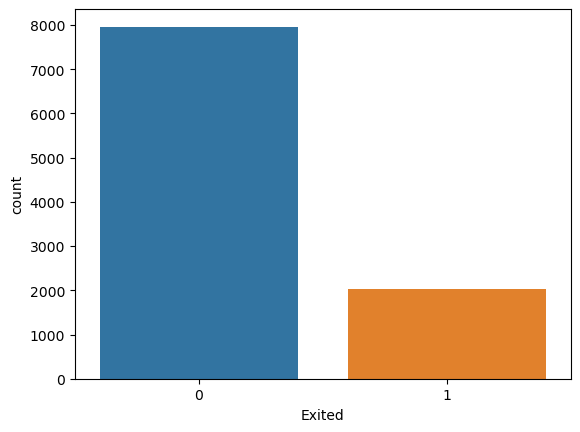

In [340]:
sns.countplot(x='Exited', data=df);

In [341]:
x.shape,y.shape

((10000, 12), (10000,))

In [342]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Random Over Sampling

In [343]:
from imblearn.under_sampling import RandomUnderSampler

In [344]:
rus = RandomUnderSampler(random_state=2529)

In [345]:
x_rus, y_rus =rus.fit_resample(x,y)

In [346]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [347]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [348]:
y_rus.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

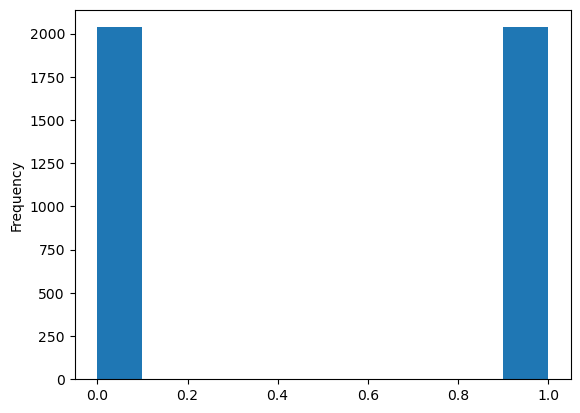

In [349]:
y_rus.plot(kind = 'hist')

# Random Over Sampling

In [350]:
from imblearn.over_sampling import RandomOverSampler

In [351]:
ros = RandomOverSampler(random_state=2529)

In [352]:
x_ros, y_ros = ros.fit_resample(x,y)

In [353]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [354]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [355]:
y_ros.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

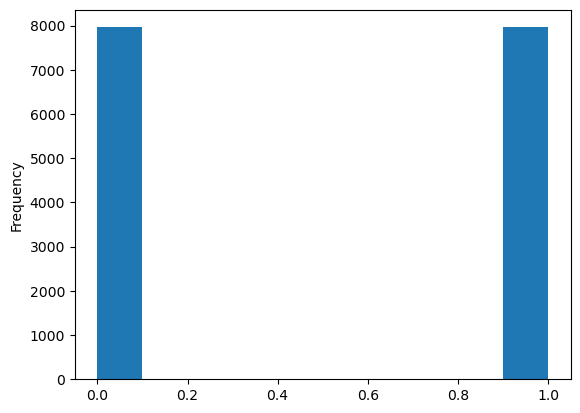

In [356]:
y_ros.plot(kind = 'hist')

# Train Test Split

In [357]:
from sklearn.model_selection import train_test_split

In [358]:
#split original data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=25)

In [359]:
#split random under sample data
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x,y,test_size=0.3,random_state=25)

In [360]:
#split random over sample data
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x,y,test_size=0.3,random_state=25)

# Standardize Features

In [361]:
from sklearn.preprocessing import StandardScaler

In [362]:
sc = StandardScaler()

In [363]:
#standardize original data
x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])
x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [364]:
#standardize random under sample data
x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])
x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [365]:
#standardize random over sample data
x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])
x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

# Support Vector Machine Classifier

In [366]:
from sklearn.svm import SVC

# Model with original data

In [367]:
svc = SVC()

In [368]:
svc.fit(x_train, y_train)

SVC()

In [369]:
y_pred = svc.predict(x_test)

In [370]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Accuracy

In [371]:
from sklearn.metrics import confusion_matrix, classification_report

In [372]:
confusion_matrix(y_test, y_pred)

array([[2419,    0],
       [ 581,    0]], dtype=int64)

In [373]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tunning

In [374]:
from sklearn.model_selection import GridSearchCV

In [375]:
param_grid = {'C':[0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf'],
             'class_weight':['balanced']}

In [376]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [377]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [378]:
grid_predictions = grid.predict(x_test)

In [379]:
confusion_matrix(y_test,grid_predictions)

array([[2419,    0],
       [ 581,    0]], dtype=int64)

In [380]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model with Random under sampling

In [381]:

svc_rus =SVC()

In [382]:
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [383]:
y_pred_rus = svc.predict(x_test_rus)

# Model accuracy

In [384]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[2419,    0],
       [ 581,    0]], dtype=int64)

In [385]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tunning

In [386]:
param_grid = {'C':[0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf'],
             'class_weight':['balanced']}

In [387]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [388]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [389]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [390]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[2419,    0],
       [ 581,    0]], dtype=int64)

In [426]:
accuracy_score(y_test_rus,grid_predictions_rus)

0.8063333333333333

In [391]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model with Random over sampling

In [392]:
svc_ros =SVC()

In [393]:
svc_ros.fit(x_train_ros,y_train_ros)

SVC()

In [394]:
y_pred_ros =svc_ros.predict(x_test_ros)

# Model Accuracy

In [422]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[2419,    0],
       [ 581,    0]], dtype=int64)

In [425]:
accuracy_score(y_test_ros,y_pred_ros)

0.8063333333333333

In [424]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [397]:
param_grid = {'C':[0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf'],
             'class_weight':['balanced']}

In [398]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [399]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [400]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [401]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2419,    0],
       [ 581,    0]], dtype=int64)

In [419]:
accuracy_score(y_test_ros,grid_predictions_ros)

0.8063333333333333

In [402]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Let Compare

In [403]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [404]:
print(classification_report(y_test_rus,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [405]:
print(classification_report(y_test_ros,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [406]:
from sklearn.tree import DecisionTreeRegressor

In [407]:
dtr = DecisionTreeRegressor()

In [408]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [409]:
y_pred=dtr.predict(x_test)

In [410]:
from sklearn.metrics import mean_squared_error

In [411]:
mean_squared_error(y_test,y_pred)

0.22966666666666666

In [412]:
accuracy_score(y_test, y_pred)

0.7703333333333333

# Random Forest Classifier

In [413]:
from sklearn.ensemble import RandomForestRegressor

In [414]:
rfg = RandomForestRegressor()

In [415]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [416]:
y_pred = rfg.predict(x_test)

In [417]:
mean_squared_error(y_test,y_pred)

0.12119003333333334

# Linear Regression Classifier

In [428]:
from sklearn.linear_model import LinearRegression

In [429]:
lr=LinearRegression()

In [430]:
lr.fit(x_train,y_train)

LinearRegression()

In [431]:
y_pred=lr.predict(x_test)

In [432]:
y_test.head(),y_pred[0:5]

(CustomerId
 15629094    1
 15690440    0
 15678333    0
 15709861    0
 15620579    0
 Name: Exited, dtype: int64,
 array([ 0.23692567,  0.11556158,  0.06432889, -0.05195099,  0.02663842]))

In [433]:
mean_squared_error(y_test,y_pred)

0.13301527910543937

# Logistic Regression Classifier

In [435]:
from sklearn.linear_model import LogisticRegression

In [436]:
lor = LogisticRegression()

In [437]:
lor.fit(x_train,y_train)

LogisticRegression()

In [438]:
y_pred= lor.predict(x_test)

In [439]:
mean_squared_error(y_test,y_pred)

0.18466666666666667